# **Reinforcement Learning and Dynamic Optimization.**

**Technical University of Crete**

Assignment 1 (2024) - Recommending News Articles to Unknown Users

Student: Karalis Asterinos

AM: 2020030107

# **Brief Description**


The code implements 2 classes:

**UCB Class** which stores values for each user type and has methods that perform the algorithm actions (select best arm, update user info)

**Bernoulli Class** which is used to get a reward based on a given probability

**test_algorithm** method that implements the algorithm

**draw_theoretical_bound** method which is used to plot the theoretical bound of regret

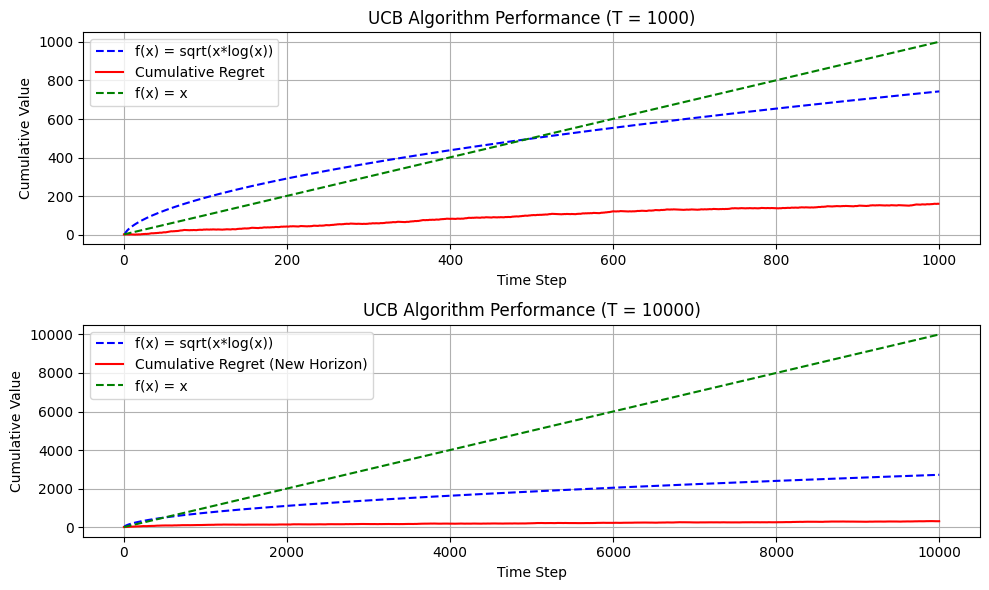

In [ ]:
import math
import random
import matplotlib.pyplot as plt

# This code is a modification of Kenneth Foo Fangwei's code,
# adjusted to the exercise's characteristics
# https://kfoofw.github.io/bandit-theory-ucb-analysis/

# UCB algorithm class
# We keep track for the stats of each user type separately
# female over 25
# male over 25
# male/female under 25
class UCB():

    def __init__(self, counts_female, values_female, counts_male,
                values_male, counts_kid, values_kid,counts_kid2, values_kids2 ):
        self.counts_female = counts_female
        self.values_female = values_female

        self.counts_male = counts_male      # Counts: Represent recorded times when arm was pulled
        self.values_male = values_male      # Values: Represent the known mean reward

        self.counts_kid = counts_kid
        self.values_kid = values_kid

        self.counts_kid2 = counts_kid2
        self.values_kids2 = values_kids2


    def initialize(self, n_arms):
        self.counts_female = [0 for _ in range(n_arms)]
        self.values_female = [0.0 for _ in range(n_arms)]

        self.counts_male = [0 for _ in range(n_arms)]
        self.values_male = [0.0 for _ in range(n_arms)]

        self.counts_kid = [0 for _ in range(n_arms)]
        self.values_kid = [0.0 for _ in range(n_arms)]

        self.counts_kid2 = [0 for _ in range(n_arms)]
        self.values_kid2 = [0.0 for _ in range(n_arms)]

    # UCB arm selection based on max of UCB reward of each arm
    def select_arm(self, user_type):
        if user_type == 'female_over_25':
            counts = self.counts_female
            values = self.values_female
        elif user_type == 'male_over_25':
            counts = self.counts_male
            values = self.values_male
        elif user_type == 'female_under_25':
            counts = self.counts_kid
            values = self.values_kid
        elif user_type == 'male_under_25':
            counts = self.counts_kid
            values = self.values_kid
        else:
            raise ValueError("Invalid user type")

        n_arms = len(counts)
        for arm in range(n_arms):
            if counts[arm] == 0:
                return arm

        ucb_values = [0.0 for _ in range(n_arms)]
        total_counts = sum(counts)

        for arm in range(n_arms):
            bonus = math.sqrt((2 * math.log(total_counts)) / float(counts[arm]))
            ucb_values[arm] = values[arm] + bonus

        return ucb_values.index(max(ucb_values))

    # Choose to update chosen arm and reward
    def update(self, chosen_arm, reward, user_type):
        if user_type == 'female_over_25':
            counts = self.counts_female
            values = self.values_female
        elif user_type == 'male_over_25':
            counts = self.counts_male
            values = self.values_male
        elif user_type == 'female_under_25':
            counts = self.counts_kid
            values = self.values_kid
        elif user_type == 'male_under_25':
            counts = self.counts_kid
            values = self.values_kid
        else:
            raise ValueError("Invalid user type")

        counts[chosen_arm] += 1
        n = counts[chosen_arm]
        value = values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        values[chosen_arm] = new_value

# Bernoulli arm class
# The reward for success returns 1 else 0
class BernoulliArm():
    def __init__(self, p):
        self.p = p

    def draw(self):
        if random.random() > self.p:
            return 0.0
        else:
            return 1.0

# Defining parameters
num_sims = 1   # How many times to run the simulation
horizon = 1000  # Defining the first horizon

# Defining arms for female over 25, male over 25, and kids (female/male under 25)
arms_female_over_25 = [BernoulliArm(0.8), BernoulliArm(0.6), BernoulliArm(0.5), BernoulliArm(0.4), BernoulliArm(0.2)]
arms_male_over_25 = list(reversed(arms_female_over_25))
arms_female_under_25 = [BernoulliArm(0.2), BernoulliArm(0.4), BernoulliArm(0.8), BernoulliArm(0.6), BernoulliArm(0.5)]
arms_male_under_25 = [BernoulliArm(0.2), BernoulliArm(0.4), BernoulliArm(0.8), BernoulliArm(0.6), BernoulliArm(0.5)]

# Initializing UCB1 algorithm
ucb = UCB([], [], [], [], [], [], [], [])

# Function to simulate the algorithm
def test_algorithm(algo, arms_female_over_25, arms_male_over_25, arms_female_under_25, arms_male_under_25, num_sims, horizon):

    chosen_arms = [0 for _ in range(num_sims * horizon)] #  keep track of which arm is chosen at each time step in each simulation.
    rewards = [0.0 for _ in range(num_sims * horizon)] # store the reward obtained from the chosen arm at each time step in each simulation.
    cumulative_rewards = [0.0 for _ in range(num_sims * horizon)] # keep track of the cumulative rewards up to each time step in each simulation.
    cumulative_regret = [0.0 for _ in range(num_sims * horizon)] # store the simulation number for each time step across all simulations.
    sim_nums = [0 for _ in range(num_sims * horizon)] # Ignore this, it's for the simulation
    times = [0 for _ in range(num_sims * horizon)] # Ignore this, it's for the simulation

    # We run our simulation 1 time so this for is kind of irrelevant in the current implementation
    for sim in range(num_sims):

        algo.initialize(len(arms_female_over_25))

        #Begging simulation
        for t in range(horizon):

            # Updating some info for the simulation
            index = sim * horizon + t
            sim_nums[index] = sim
            times[index] = t + 1

            # Randomly choose user type for this round
            user_type = random.choice(['female_over_25', 'male_over_25', 'female_under_25', 'male_under_25'])

            # Select arm using UCB algorithm based on user type
            if user_type == 'female_over_25':
                # Select an arm based on the info (ucb values) we have for selected user
                chosen_arm = algo.select_arm('female_over_25')
                # Show the user the article (arm) we have chosen based on our info
                # Then see if the user's clicks it using the Bernoulli arm and save the reward
                # Same logic for the rest user types
                reward = arms_female_over_25[chosen_arm].draw()
            elif user_type == 'male_over_25':
                chosen_arm = algo.select_arm('male_over_25')
                reward = arms_male_over_25[chosen_arm].draw()
            elif user_type == 'female_under_25':
                chosen_arm = algo.select_arm('female_under_25')
                reward = arms_female_under_25[chosen_arm].draw()
            else:
                chosen_arm = algo.select_arm('male_under_25')
                reward = arms_male_under_25[chosen_arm].draw()

            # Save info
            chosen_arms[index] = chosen_arm
            rewards[index] = reward

            if t == 0:
                cumulative_rewards[index] = reward
            else:
                cumulative_rewards[index] = cumulative_rewards[index - 1] + reward

            # Calculate regret
            if user_type == 'female_over_25':
                optimal_reward = max(arm.p for arm in arms_female_over_25)
            elif user_type == 'male_over_25':
                optimal_reward = max(arm.p for arm in arms_male_over_25)
            elif user_type == 'female_under_25':
                optimal_reward = max(arm.p for arm in arms_female_under_25)
            else:
                optimal_reward = max(arm.p for arm in arms_male_under_25)

            cumulative_regret[index] = (t + 1) * optimal_reward - cumulative_rewards[index]

            # Update algorithm with chosen arm and reward
            if user_type == 'female_over_25':
                algo.update(chosen_arm, reward, 'female_over_25')
            elif user_type == 'male_over_25':
                algo.update(chosen_arm, reward, 'male_over_25')
            elif user_type == 'female_under_25':
                algo.update(chosen_arm, reward, 'female_under_25')
            else:
                algo.update(chosen_arm, reward, 'male_under_25')

    return sim_nums, times, chosen_arms, rewards, cumulative_rewards, cumulative_regret

# Define the logarithmic function
# This function is used to generate the theoretical upper bound
# of the cumulative regret.
def draw_theoretical_bound(x):
    return (4*math.sqrt(5*x*math.log(x))) if x > 0 else 0  # Avoid log(0)

# Simulate the algorithm for horizon = 1000
sim_nums, times, chosen_arms, rewards, cumulative_rewards, cumulative_regret = test_algorithm(ucb, arms_female_over_25, arms_male_over_25, arms_female_under_25, arms_male_under_25, num_sims, horizon)

# New horizon
new_horizon = 10000

# Simulate the algorithm with the new horizon
new_sim_nums, new_times, new_chosen_arms, new_rewards, new_cumulative_rewards, new_cumulative_regret = test_algorithm(ucb, arms_female_over_25, arms_male_over_25, arms_female_under_25, arms_male_under_25, num_sims, new_horizon)

# Plot results
plt.figure(figsize=(10, 6))

# Plot cumulative regret or the first horizon
# Also plot linear function and the theoretical bound for comparison
plt.subplot(2, 1, 1)
plt.plot(range(1, num_sims * horizon + 1), [draw_theoretical_bound(t + 1) for t in range(num_sims * horizon)],
        linestyle='--', label='R(T) = 4*sqrt(5*T*log(T))', color='blue')
plt.plot(range(num_sims * horizon), cumulative_regret, label='Cumulative Regret', color='red')
plt.plot(range(num_sims * horizon), [t + 1 for t in range(num_sims * horizon)], linestyle='--', label='f(x) = x', color='green')
plt.xlabel('Time Step')
plt.ylabel('Cumulative Value')
plt.title('UCB Algorithm Performance (T = 1000)')
plt.legend()
plt.grid(True)

# Plot  cumulative regret for the second horizon
# Also plot linear function and the theoretical bound for comparison
plt.subplot(2, 1, 2)
plt.plot(range(1, num_sims * new_horizon + 1), [draw_theoretical_bound(t + 1) for t in range(num_sims * new_horizon)],
        linestyle='--', label='R(T) = 4*sqrt(5*T*log(T))', color='blue')
plt.plot(range(num_sims * new_horizon), new_cumulative_regret, label='Cumulative Regret (New Horizon)', color='red')
plt.plot(range(num_sims * new_horizon), [t + 1 for t in range(num_sims * new_horizon)], linestyle='--', label='f(x) = x', color='green')
plt.xlabel('Time Step')
plt.ylabel('Cumulative Value')
plt.title('UCB Algorithm Performance (T = 10000)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()